<a href="https://colab.research.google.com/github/nisaBayhan/fashion_mnist_data/blob/main/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kodlar, yapay zekaya giriş eğitimi için chatgpt yardımı ile hazırlanmıştır. Kodların neyi neden yaptığını anlamak amacıyla bir sunum hazırlanarak pdf halinde githuba yüklenmiştir.

In [ ]:
# Gerekli kütüphanelerin yüklenmesi
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report, confusion_matrix

# Veri setinin yüklenmesi
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [ ]:
# Veri boyutlarının yazdırılması
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Görüntü boyutlarının yazdırılması
print(f"Training data shape: {X_train.shape[1:]}")
print(f"Test data shape: {X_test.shape[1:]}")


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Training data shape: (28, 28)
Test data shape: (28, 28)


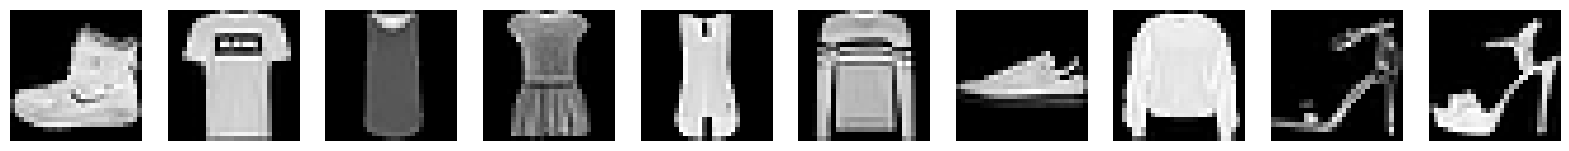

In [ ]:
# Görüntülerin görselleştirilmesi
fig, axes = plt.subplots(1, 10, figsize=(20, 3))
for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()


In [ ]:
# Verilerin normalize edilmesi
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
# CNN modelinin oluşturulması
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Modelin derlenmesi
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Modelin eğitilmesi
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 85s 44ms/step - loss: 0.4478 - accuracy: 0.8386 - val_loss: 0.3833 - val_accuracy: 0.8600
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3010 - accuracy: 0.8888 - val_loss: 0.3104 - val_accuracy: 0.8898
Epoch 3/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2536 - accuracy: 0.9063 - val_loss: 0.2734 - val_accuracy: 0.9018
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2221 - accuracy: 0.9172 - val_loss: 0.2655 - val_accuracy: 0.9033
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1940 - accuracy: 0.9274 - val_loss: 0.2471 - val_accuracy: 0.9098
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1723 - accuracy: 0.9350 - val_loss: 0.2518 - val_accuracy: 0.9106
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1533 - accuracy: 0.9423 - val_loss: 0.2567 -

313/313 - 2s - loss: 0.3061 - accuracy: 0.9104 - 2s/epoch - 7ms/step

Test accuracy: 0.9103999733924866


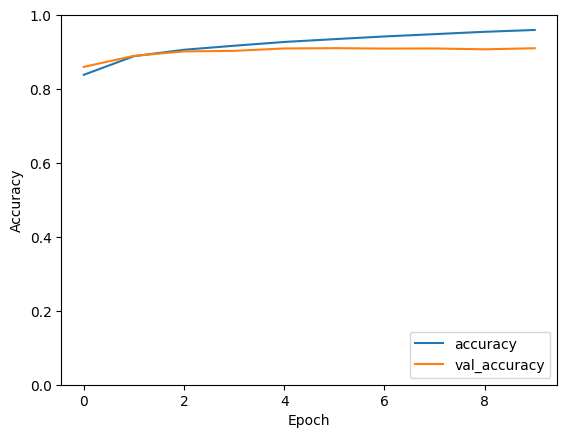

In [ ]:
# Modelin değerlendirilmesi
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Sonuçların görselleştirilmesi
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Tahminler ve karışıklık matrisi
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.85      0.88      0.86      1000
           3       0.92      0.94      0.93      1000
           4       0.85      0.88      0.86      1000
           5       0.96      0.99      0.98      1000
           6       0.77      0.71      0.74      1000
           7       0.98      0.92      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

[[852   0  24  12   5   2 101   0   4   0]
 [  2 975   2  13   4   0   3   0   1   0]
 [ 14   0 882   9  42   0  52   0   1   0]
 [ 14   1   7 940  19   1  17   0   1   0]
 [  1   0  61 